In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from librarian.utils import DataLoader, validate_data, create_data_summary, quick_load
from librarian.core import MoviesAnalytics
from librarian.models import StatisticalAnalysis, SegmentationAnalysis, TrendAnalysis, PerformanceMetrics

In [3]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [4]:
loader = DataLoader()
movies, credits, keywords, ratings = loader.load_all_data()

Loading...
Loading movies from: /Users/phuongdoan/Downloads/dataset/movies_metadata.csv
Movies: 45466 rows, 24 columns
Loading credits from: /Users/phuongdoan/Downloads/dataset/credits.csv
Credits: 45476 rows, 5 columns
Loading keywords from: /Users/phuongdoan/Downloads/dataset/keywords.csv
Keywords: 46419 rows, 2 columns
Loading ratings from: /Users/phuongdoan/Downloads/dataset/ratings.csv
Ratings: 26024289 rows, 4 columns
Data loaded successfully!


In [5]:
validate_data(movies, credits, keywords, ratings)

Data is valid!


True

In [6]:
summary = create_data_summary(movies)
print(summary.to_string(index=False))

              Metric      Value
        Total Movies      45466
  Movies with Budget       8893
 Movies with Revenue      45466
  Movies with Rating      45460
 Average Budget (M$)       4.22
Average Revenue (M$)      11.21
      Average Rating       5.62
        Rating Range 0.0 - 10.0


In [7]:
loader.get_data_info()


MOVIES DATAFRAME INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 no

In [10]:
print("\n" + "=" * 30)
print("INITIALIZING ANALYTICS ENGINE")
print("=" * 30)

analytics = MoviesAnalytics(movies, credits, keywords, ratings)

print(f'Clean data: {len(analytics.movies_clean)} movies')
print(f'Release year: {int(analytics.movies_clean['release_year'].min())} - {int(analytics.movies_clean['release_year'].max())}')
print(f'Average revenue: ${analytics.movies_clean['revenue'].mean()/1e6:.2f}M')
print(f'Average budget: ${analytics.movies_clean['budget'].mean()/1e6:.2f}M')


INITIALIZING ANALYTICS ENGINE
Clean data: 5369 movies
Release year: 1915 - 2017
Average revenue: $90.51M
Average budget: $31.16M



GENRE ANALYSIS

 Top 10 Genres by Revenue:
                  avg_revenue  median_revenue  total_revenue   avg_budget  \
genres_list                                                                 
Animation        2.236707e+08     117932401.0   6.553552e+10  63497364.62   
Adventure        2.044798e+08      85370015.0   1.963006e+11  63751627.89   
Fantasy          1.987378e+08      84552250.0   1.015550e+11  61900663.04   
Family           1.950257e+08      94547600.5   1.037537e+11  57850385.91   
Science Fiction  1.526022e+08      50315140.0   9.659721e+10  52463547.90   
Action           1.391497e+08      54744738.0   1.966185e+11  49770630.35   
Thriller         8.388283e+07      33956608.0   1.260759e+11  32375895.78   
Comedy           8.375013e+07      32723359.5   1.546027e+11  28332715.95   
War              7.696948e+07      25561499.5   1.570177e+10  31729359.87   
Mystery          7.534317e+07      27793200.0   3.337702e+10  29511659.53   

                 median_budget 

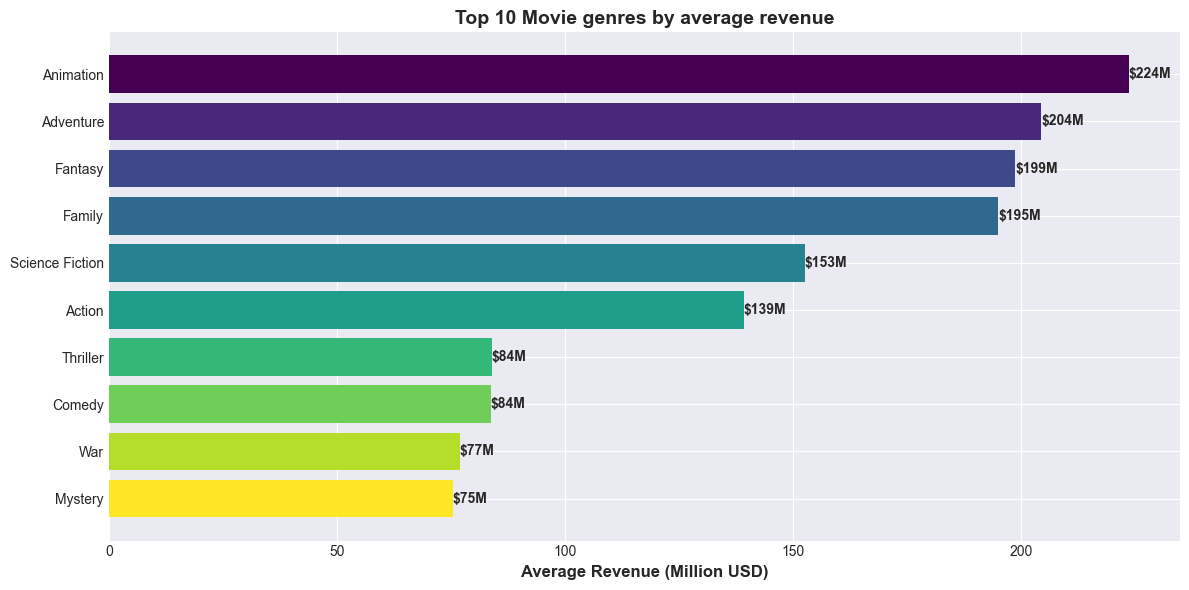

In [17]:
print("\n" +"=" *20)
print("GENRE ANALYSIS")
print("="*20)

genre_stats = analytics.analyze_genre_impact()
print('\n Top 10 Genres by Revenue:')
print(genre_stats.head(10))

fig1 = analytics.plot_genre_revenue_comparison(top_n=10)
plt.show()


BUDGET AND REVENUE ANALYSIS

 Correlation: 0.7301

 Analysis by Budget vs Revenue


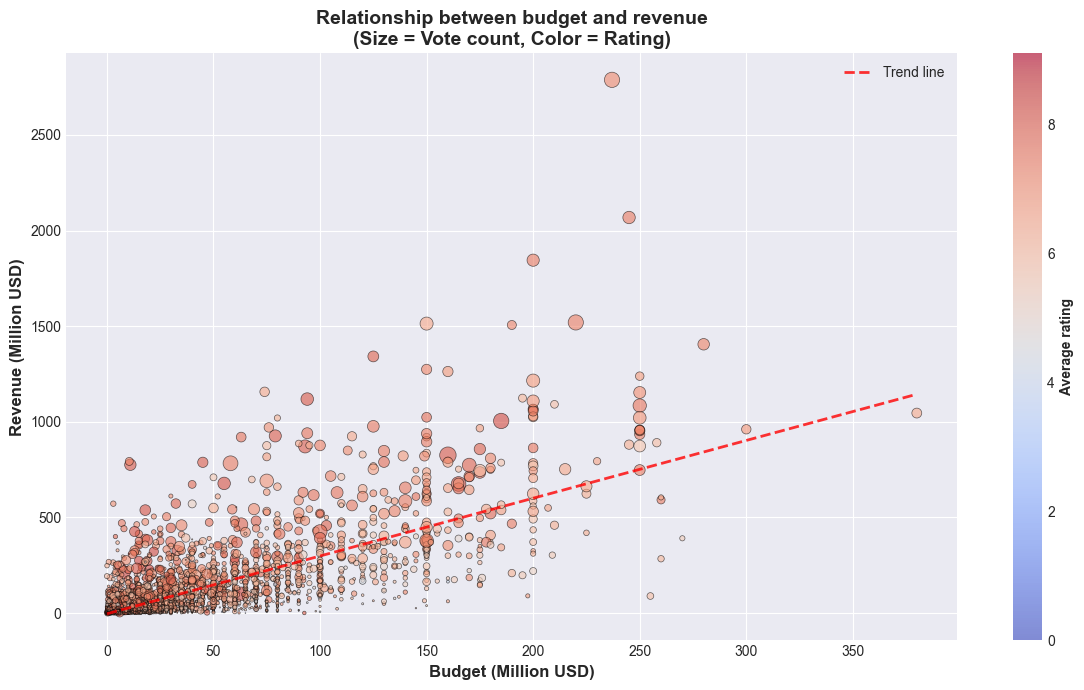

In [15]:
print('\n'+'=' * 30)
print('BUDGET AND REVENUE ANALYSIS')
print('='*30)

correlation, budget_analysis = analytics.analyze_budget_revenue_relationship()
print(f'\n Correlation: {correlation:.4f}')
print('\n Analysis by Budget vs Revenue')

fig2 = analytics.plot_budget_vs_revenue()
plt.show()




RUNTIM IMPACT ANALYSIS

 Impact of Movie Runtime
                 avg_revenue   avg_budget  avg_rating    avg_roi  count
runtime                                                                
(25.688, 65.0]  4.426679e+06   3920131.10        6.50     371.69     10
(65.0, 104.0]   6.469087e+07  23736386.90        6.00  987207.92   2501
(104.0, 143.0]  1.062474e+08  36679267.47        6.46  211141.49   2488
(143.0, 182.0]  1.664966e+08  47467036.49        6.86     318.40    319
(182.0, 221.0]  1.365696e+08  31304128.89        7.20     531.00     45
(221.0, 260.0]  1.284454e+08  10228750.00        7.18    3934.80      4
(299.0, 338.0]  2.485640e+06   9700000.00        6.85      48.85      2


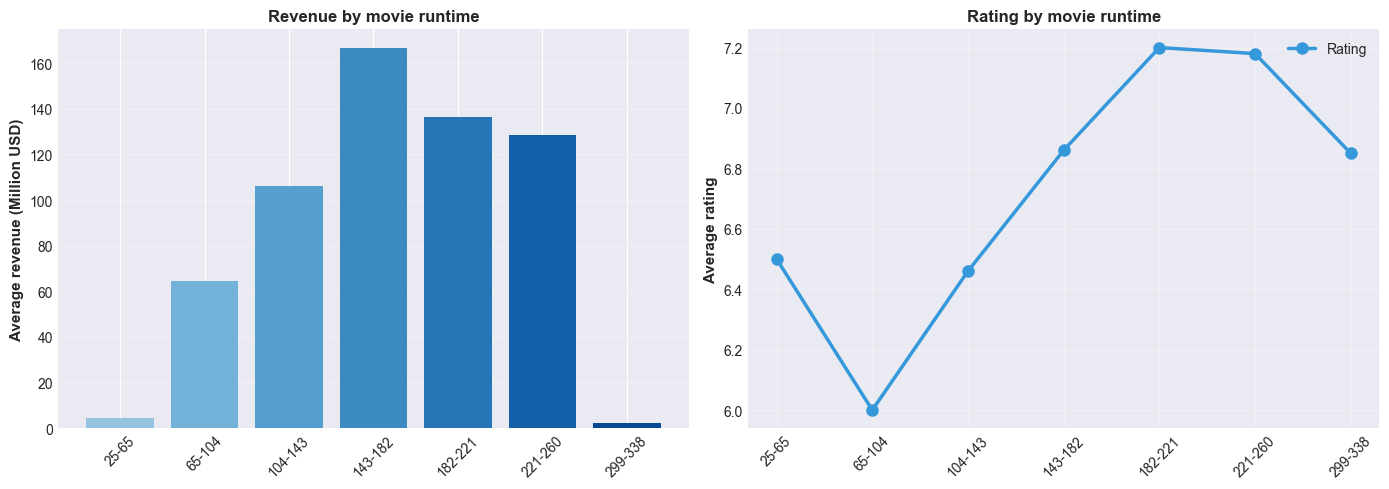

In [ ]:
print('\n' + '=' *30)
print('RUNTIME IMPACT ANALYSIS')
print('=' *30)

runtime_analysis = analytics.analyze_runtime_impact()
print('\n Impact of Movie Runtime')
print(runtime_analysis)

fig3 = analytics.plot_runtime_impact()
plt.show()


SEASONAL RELEASE PATTERNS

 Release Patterns by Month:
                avg_revenue  median_revenue  movie_count  avg_rating  \
release_month                                                          
1.0            4.338613e+07      19478518.5          340        6.05   
2.0            6.778894e+07      27685016.0          367        6.17   
3.0            8.761058e+07      31585605.5          400        6.22   
4.0            8.300393e+07      26138709.5          398        6.16   
5.0            1.352033e+08      24094461.0          414        6.39   
6.0            1.541219e+08      57138719.0          457        6.28   
7.0            1.173781e+08      57692562.5          430        6.23   
8.0            5.779030e+07      24495950.0          474        6.10   
9.0            4.446938e+07      15478800.0          623        6.31   
10.0           6.458382e+07      22540359.0          495        6.33   
11.0           1.215750e+08      41387687.0          413        6.40   
12.0    

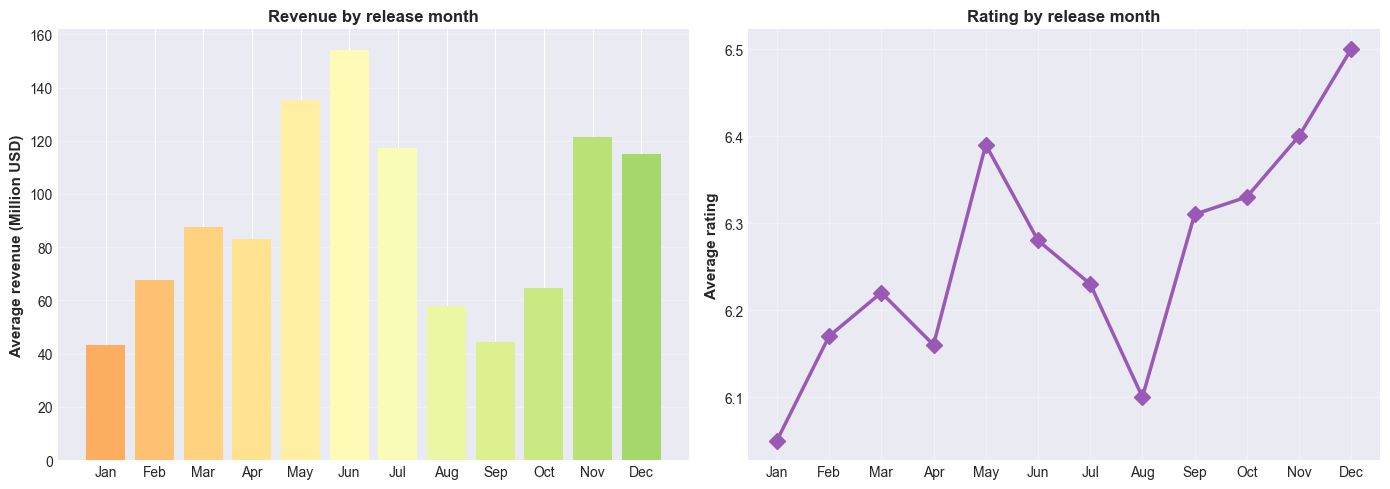

In [19]:
print('\n'+'=' *25)
print('SEASONAL RELEASE PATTERNS')
print('='*25)

seasonal = analytics.analyze_seasonal_release_impact()
print('\n Release Patterns by Month:')
print(seasonal)

fig4 = analytics.plot_seasonal_release_patterns()
plt.show()


INDUSTRY TRENDS ANALYSIS

 Film Industry Trends Over the Years (2000 onwards):
               avg_budget  median_budget  total_budget   avg_revenue  median_revenue  total_revenue    avg_profit     avg_roi  avg_rating  avg_runtime  movie_count
release_year                                                                                                                                                       
2000.0        37379627.13     26000000.0  5.008870e+09  8.582498e+07      39016894.5   1.150055e+10  4.844536e+07      149.29        6.13       110.86          134
2001.0        38102076.41     28000000.0  5.562903e+09  9.548908e+07      39830701.5   1.394141e+10  5.738700e+07      170.19        6.16       110.22          146
2002.0        36623959.94     30000000.0  5.823210e+09  9.558839e+07      41323171.0   1.519855e+10  5.896443e+07      250.09        6.21       108.05          159
2003.0        40284059.91     26000000.0  5.639768e+09  1.099033e+08      60403211.5   1.538646e+10 

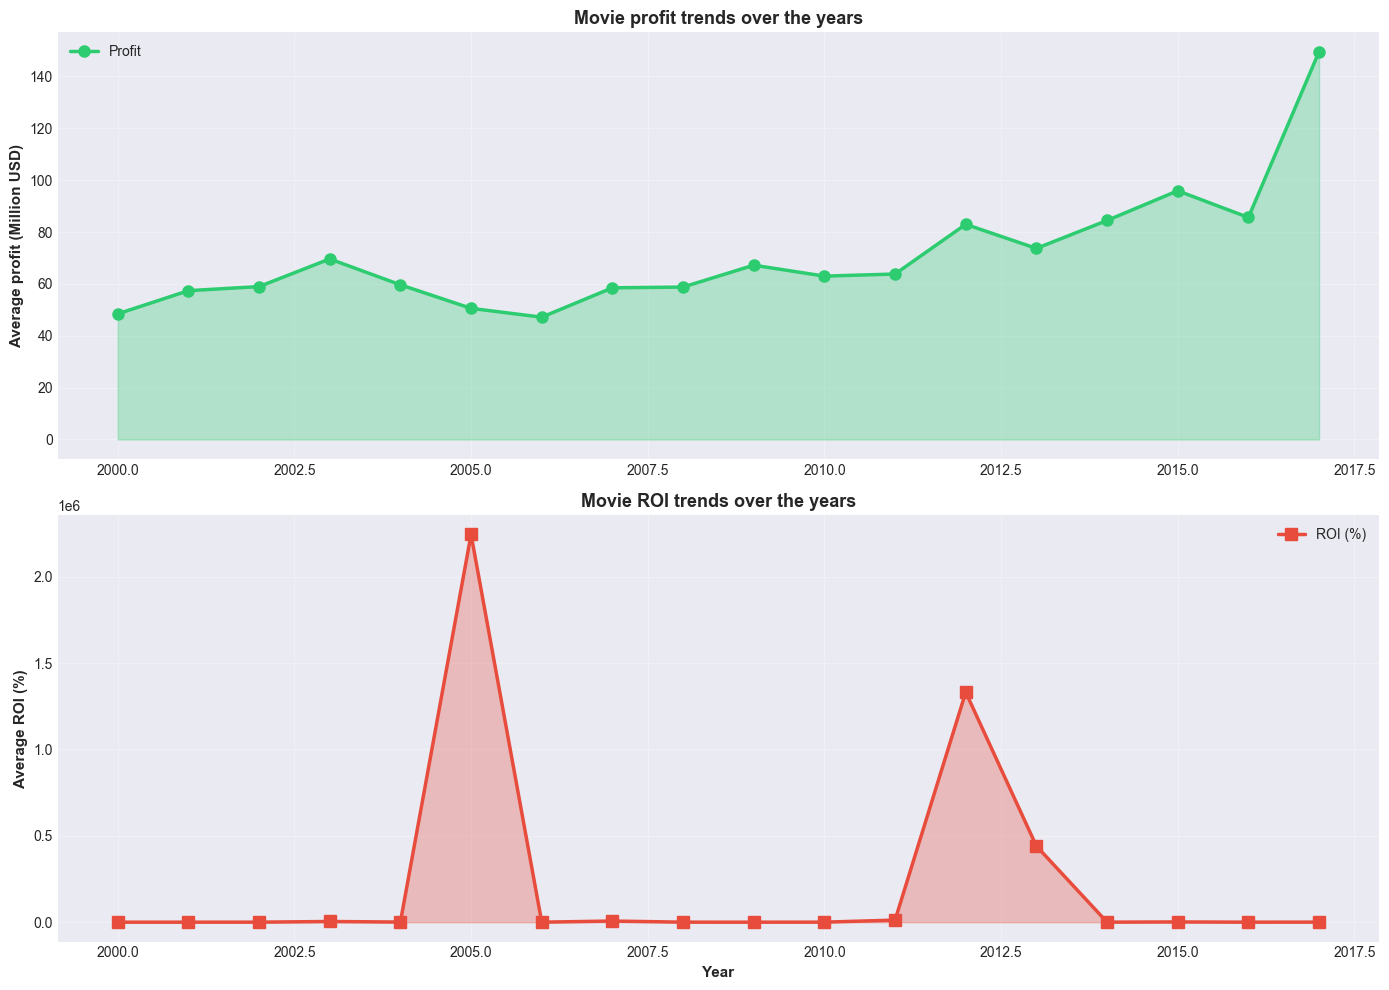

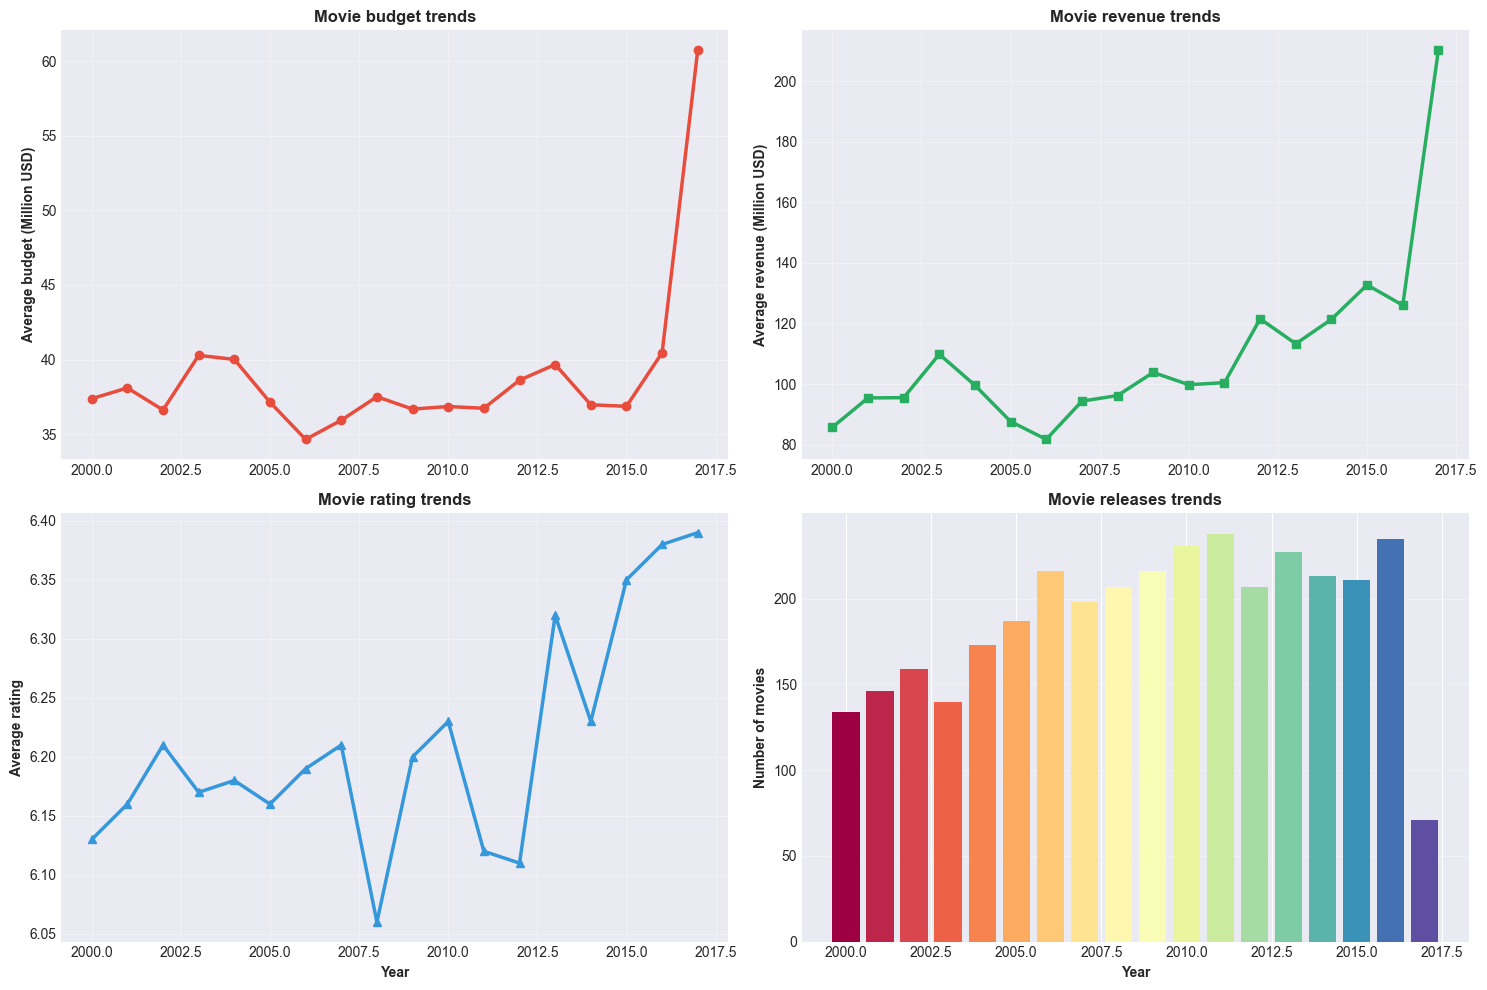

In [20]:
print('\n' + '=' * 30)
print('INDUSTRY TRENDS ANALYSIS')
print('='*30)

yearly_stats = analytics.analyze_industry_trends()
print('\n Film Industry Trends Over the Years (2000 onwards):')
print(yearly_stats[yearly_stats.index >= 2000].to_string())

fig5= analytics.plot_profitability_trends()
plt.show()

fig6=analytics.plot_industry_evolution()
plt.show()



In [25]:
print("\n" + "=" * 50)
print("ADVANCED STATISTICAL ANALYSIS")
print("=" * 50)

stat_analysis = StatisticalAnalysis(analytics.movies_clean)

#correlation between variables
print("\nCorrelation Matrix:")
corr_matrix = stat_analysis.correlation_analysis()
print(corr_matrix)

#detailed stats for budget
print("\nBudget Statistics:")
budget_stats = stat_analysis.statistical_summary('budget')
for key, value in budget_stats.items():
    print(f"   {key}: {value:,.0f}" if key != 'skewness' and key != 'kurtosis' else f"   {key}: {value:.3f}")

#detailed stats for revenue
print("\nRevenue Statistics:")
revenue_stats = stat_analysis.statistical_summary('revenue')
for key, value in revenue_stats.items():
    print(f"   {key}: {value:,.0f}" if key != 'skewness' and key != 'kurtosis' else f"   {key}: {value:.3f}")


ADVANCED STATISTICAL ANALYSIS

Correlation Matrix:
                budget   revenue   runtime  vote_average  popularity
budget        1.000000  0.730080  0.190458     -0.007585    0.307519
revenue       0.730080  1.000000  0.189260      0.167127    0.440204
runtime       0.190458  0.189260  1.000000      0.317293    0.086854
vote_average -0.007585  0.167127  0.317293      1.000000    0.161026
popularity    0.307519  0.440204  0.086854      0.161026    1.000000

Budget Statistics:
   count: 5,369
   mean: 31,155,319
   median: 17,000,000
   std: 40,186,810
   min: 1
   q25: 5,200,000
   q75: 40,000,000
   max: 380,000,000
   skewness: 2.517
   kurtosis: 8.039

Revenue Statistics:
   count: 5,369
   mean: 90,511,534
   median: 30,000,000
   std: 166,277,295
   min: 1
   q25: 7,070,330
   q75: 100,000,000
   max: 2,787,965,087
   skewness: 4.474
   kurtosis: 32.713


In [26]:
print('\n' + '=' * 30)
print('SEGMENTATION ANALYSIS')
print('=' * 30)

segment_analysis = SegmentationAnalysis(analytics.movies_clean)

print('\n Segmentation by budget:')
budget_segments = segment_analysis.segment_by_budget(bins=4)
print(budget_segments)

print('\n Segmentation by rating:')
rating_segments = segment_analysis.segment_by_rating(bins=3)
print(rating_segments)

print('\n Segmentation by runtime:')
runtime_segments = segment_analysis.segment_by_runtime(bins=4)
print(runtime_segments)


SEGMENTATION ANALYSIS

 Segmentation by budget:
                     revenue       vote_average        profit
                        mean count         mean          mean
budget_segment                                               
Low             1.584773e+07  1345         6.40  1.361021e+07
Medium          3.794168e+07  1382         6.31  2.708864e+07
High            7.299694e+07  1392         6.18  4.531044e+07
Very High       2.484753e+08  1250         6.22  1.598953e+08

 Segmentation by rating:
                     revenue       budget    id
rating_segment                                 
Low             6.285603e+07  32086998.69  2035
Medium          9.668305e+07  33839014.83  1672
High            1.181651e+08  27314700.80  1662

 Segmentation by runtime:
                      revenue  vote_average       budget    id
runtime_segment                                               
Short            6.182995e+07          5.92  21578807.56  1370
Normal           6.864993e+07      

In [28]:
print('\n'+'=' * 20)
print('TREND ANALYSIS')
print('=')

trend_analysis = TrendAnalysis(analytics.movies_clean)

print('\n Revenue trend (moving average):')
revenue_trend = trend_analysis.moving_average('revenue',window=5)
print(revenue_trend[revenue_trend['year'] >= 2000])

print('\n Year-over-year revenue growth:')
yoy_growth = trend_analysis.year_over_year_growth('revenue')
print(yoy_growth[yoy_growth['year'] >= 2000])


TREND ANALYSIS
=

 Revenue trend (moving average):
    year       revenue    moving_avg
81  2000  8.582498e+07  8.969605e+07
82  2001  9.548908e+07  9.514746e+07
83  2002  9.558839e+07  9.729350e+07
84  2003  1.099033e+08  9.767185e+07
85  2004  9.966172e+07  9.493782e+07
86  2005  8.771676e+07  9.470432e+07
87  2006  8.181891e+07  9.198106e+07
88  2007  9.442088e+07  9.282832e+07
89  2008  9.628705e+07  9.525523e+07
90  2009  1.038980e+08  9.900062e+07
91  2010  9.985132e+07  1.044346e+08
92  2011  1.005459e+08  1.078476e+08
93  2012  1.215908e+08  1.113544e+08
94  2013  1.133523e+08  1.179403e+08
95  2014  1.214319e+08  1.230459e+08
96  2015  1.327806e+08  1.407846e+08
97  2016  1.260742e+08           NaN
98  2017  2.102841e+08           NaN

 Year-over-year revenue growth:
    year       revenue  yoy_growth
81  2000  8.582498e+07   -3.493218
82  2001  9.548908e+07   11.260234
83  2002  9.558839e+07    0.104007
84  2003  1.099033e+08   14.975575
85  2004  9.966172e+07   -9.318720
86

In [29]:
print('\n'+ '=' * 20)
print('PERFORMANCE METRICS')
print('='*20)

perf_metrics = PerformanceMetrics(analytics.movies_clean)

#add metrics to DataFrame
analytics.movies_clean['ROI'] = perf_metrics.calculate_roi()
analytics.movies_clean['Profitability_Ratio'] = perf_metrics.calculate_profitability_ratio()
analytics.movies_clean['Efficiency_Score'] = perf_metrics.efficiency_score()

print('\n Top 10 Movies by ROI:')
top_roi = analytics.movies_clean.nlargest(10, 'ROI')[['title','budget','revenue','ROI','vote_average']]
print(top_roi.to_string())

print('\n Top 10 Movies by Efficiency Score:')
top_efficiency = analytics.movies_clean.nlargest(10, 'Efficiency_Score')[['title','budget','revenue','Efficiency_Score']]
print(top_efficiency.to_string())
                                                    



PERFORMANCE METRICS

 Top 10 Movies by ROI:
                         title   budget      revenue           ROI  vote_average
4000            Less Than Zero      1.0   12396383.0  1.239638e+09           6.1
3342              Modern Times      1.0    8500000.0  8.499999e+08           8.1
14372    Welcome to Dongmakgol      8.0   33579813.0  4.197476e+08           7.7
22278           Aquí Entre Nos      1.0    2755584.0  2.755583e+08           6.0
2308   The Karate Kid, Part II    113.0  115103979.0  1.018618e+08           5.9
25989                Nurse 3-D     10.0   10000000.0  9.999990e+07           4.9
16664       From Prada to Nada     93.0    2500000.0  2.688072e+06           5.0
14192      Paranormal Activity  15000.0  193355800.0  1.288939e+06           5.9
8211                 Tarnation    218.0    1162014.0  5.329339e+05           7.5
2595   The Blair Witch Project  60000.0  248000000.0  4.132333e+05           6.3

 Top 10 Movies by Efficiency Score:
                           

In [31]:
print('\n'+'='*30)
print('KEY INSIGHT & SUMMARY REPORT')
print('='*30)

report = analytics.generate_summary_report()
print(report)


KEY INSIGHT & SUMMARY REPORT


- GENERAL STATISTICS:
   • Total movies analyzed: 5,369
   • Release year range: 1915 - 2017
   • Average revenue: $90.51M
   • Average budget: $31.16M
   • Average rating: 6.28/10

- BUDGET VS REVENUE ANALYSIS:
   • Correlation: 0.730
   • Average profit: $59.36M
   • Average ROI: 557733.66%

- TOP 5 GENRES BY REVENUE:
   1. Animation: $223.67M | Rating: 6.48 | Count: 293
   2. Adventure: $204.48M | Rating: 6.25 | Count: 960
   3. Fantasy: $198.74M | Rating: 6.17 | Count: 511
   4. Family: $195.03M | Rating: 6.19 | Count: 532
   5. Science Fiction: $152.60M | Rating: 6.10 | Count: 633


- BEST RELEASE MONTH:
   Month 6: $154.12M average revenue
   Rating: 6.28

- OPTIMAL MOVIE RUNTIME:
   Average: 110 minutes
   Range: 26 - 338 minutes



In [35]:
print('\n'+'='*25)
print('VISUALIZATION SUMMARY')
print('='*25)
print("""
Figure 1: Genre Revenue Comparison (Top 10)
Figure 2: Budget vs Revenue Relationship (Scatter + Trend)
Figure 3: Runtime Impact on Revenue & Rating
Figure 4: Seasonal Release Patterns
Figure 5: Profitability & ROI Trends
Figure 6: Industry Evolution (4 metrics over time)
""")


VISUALIZATION SUMMARY

Figure 1: Genre Revenue Comparison (Top 10)
Figure 2: Budget vs Revenue Relationship (Scatter + Trend)
Figure 3: Runtime Impact on Revenue & Rating
Figure 4: Seasonal Release Patterns
Figure 5: Profitability & ROI Trends
Figure 6: Industry Evolution (4 metrics over time)

